pandemic started at 91th day 
end of pandemic in 1472th day
length : 1381 days


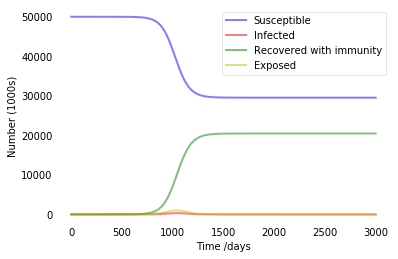

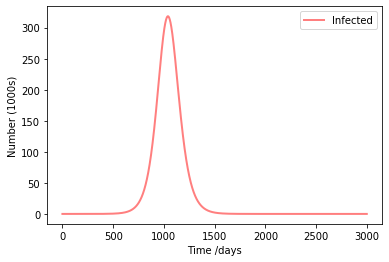

(   $\beta$  $\gamma$  $\sigma$     e  $k_{1}$  $k_{2}$  $\beta^{+}$  \
 0      0.6       0.2  0.071429  0.05      0.6      0.4          0.8   
 
    $\gamma^{+}$  $\delta$  
 0          0.25       0.6  ,
 array([1.00000000e+00, 8.03731691e-01, 6.61742554e-01, ...,
        2.62790545e-06, 2.59215072e-06, 2.55687785e-06]),
 array([49999999.        , 49999998.73523539, 49999998.51999346, ...,
        29531905.79784978, 29531905.79784933, 29531905.79784888]))

In [9]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd


def deriv(y, t, N, beta, gamma,sigma,e, k1, k2, betap, gammap, delta ):
    S, I, R, E = y
    C1 = ((1-e)*(1-k1)+e*(1-k2)) * (betap*delta+beta*(1-delta))
    C2 = gammap*((1-e)*k1+e*k2)+gamma*(1 - ((1-e)*k1+e*k2))
    
    dSdt = -C1 * S * I / N
    dEdt = C1 * S * I / N - sigma*E
    dIdt = sigma*E- I* C2
    dRdt = I*C2
    
    return dSdt, dIdt, dRdt, dEdt
'''
N = 50000000
I0, R0, E0 = 1, 0, 0
S0 = N - I0 - R0 - E0
beta = 0.6
gamma = 0.2
sigma = 1/14
e = 0.05
k1 = 0.6
k2 = 0.4
betap = 0.8
gammap = 0.25
delta = 0.6
period = 3000
'''

def pandemic(beta, gamma, sigma, e, k1, k2, betap, gammap, delta):
    N = 50000000
    period = 3000
    I0, R0, E0 = 1, 0, 0
    S0 = N - I0 - R0 - E0
    Constant_Frame = [beta, gamma, sigma, e, k1, k2, betap, gammap, delta]

    t = np.linspace(0, period, period)


    y0 = S0, I0, R0, E0
    ret = odeint(deriv, y0, t, args=(N, beta, gamma, sigma, e, k1, k2, betap, gammap, delta))
    S, I, R, E = ret.T

    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, axisbelow=True)
    ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.plot(t, E/1000, 'y', alpha=0.5, lw=2, label='Exposed')

    result = np.where(I == np.amax(np.max(I)))
    peakday = (result[0][0])

    list = [0, 0]
    for i in range(peakday):
        if I[i]>1:
            print("pandemic started at {}th day ".format(i))
            list[0] = i
            break
    for j in range(peakday, period):
        if I[j] < 0.01*np.max(I):
            print ("end of pandemic in {}th day".format(j))
            list[1] = j
            break  
    print("length : {} days".format(list[1]-list[0]))



    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    # ax.set_ylim(0,1.2)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()

    plt.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
    plt.xlabel('Time /days')
    plt.ylabel('Number (1000s)')
    plt.legend()
    plt.show()

    cols= [r'$\beta$', '$\gamma$', '$\sigma$', 'e', '$k_{1}$', '$k_{2}$', r'$\beta^{+}$'\
    , '$\gamma^{+}$', '$\delta$']

    df = pd.DataFrame([Constant_Frame], columns=cols)
    
    
    Infect1  = I
    Susceptible1 = S
    return df, Infect1, Susceptible1


'''
N = 50000000
I0, R0, E0 = 1, 0, 0
S0 = N - I0 - R0 - E0
beta = 0.6
gamma = 0.2
sigma = 1/14
e = 0.05
k1 = 0.6
k2 = 0.4
betap = 0.8
gammap = 0.25
delta = 0.6
period = 3000
'''

pandemic(0.6, 0.2, 1/14, 0.05, 0.6, 0.4, 0.8, 0.25, 0.6)